# Import essential library

In [532]:
#Essential
import pandas as pd
import numpy as np

#EDA
import seaborn as sns
from matplotlib import pyplot as plt

#Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer

#Preprocess
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
#Up & down sampling for unbalanced data
from imblearn.combine import SMOTETomek

#Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Data preprocess

## Read the dataset

In [533]:
train = pd.read_csv('../input/2022-data-science-hw1/train.csv')
test = pd.read_csv('../input/2022-data-science-hw1/test.csv')

## Feature selection

### Info
1. 當天日期
2. 氣象站的地區
3. 最低溫度(攝氏)
4. 最高溫度(攝氏)
5. 降雨量 (單位: 毫米)
6. 蒸發量
7. 當天陽光出現的時數
8. 最強陣風方向
9. 最強陣風速度 (單位: 公里/小時)
10. 下午三點的風向
11. 下午三點前的平均風速 (單位: 公里/小時)
12. 下午三點的相對濕度
13. 下午三點前的平均大氣壓(hpa)
14. 下午三點,雲層遮蓋天空的比例 (0 完全晴朗無雲 - 8 完全多雲)
15. 下午三點的溫度

16. 今天有沒有下雨
17. 明天會不會下雨(class label)

In [534]:
features = train.columns[0: 16].tolist()
print("Selected features=")
print(features)

train_data = train[features]

#Yes/No to 1/0
y = train['Attribute17'].map({'Yes': 1, 'No': 0})

Selected features=
['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10', 'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15', 'Attribute16']


## Test if the data imbalance

In [535]:
y.value_counts()

0    13965
1     3138
Name: Attribute17, dtype: int64

### Ans is Yes

## Data info

In [536]:
train_data.describe()

,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute9,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15
count,17103.000000,17032.000000,17071.000000,16942.000000,9702.000000,8872.000000,16017.000000,16797.000000,16688.000000,15434.000000,10151.000000,16809.000000
mean,23.709700,12.093812,23.320807,2.163227,5.504690,7.787399,39.598614,18.535274,50.440916,1015.495490,4.411782,21.819020
std,14.337508,6.375696,7.090945,7.803880,4.265544,3.709847,13.445134,8.722155,20.411192,7.013652,2.708002,6.920011
min,0.000000,-8.500000,-2.900000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,-3.800000
25%,11.000000,7.500000,18.000000,0.000000,2.600000,5.200000,30.000000,13.000000,36.000000,1010.700000,2.000000,16.700000
50%,23.000000,11.950000,22.700000,0.000000,4.800000,8.600000,39.000000,19.000000,51.000000,1015.500000,5.000000,21.200000
75%,36.000000,16.700000,28.400000,0.600000,7.400000,10.700000,46.000000,24.000000,64.000000,1020.200000,7.000000,26.600000
max,48.000000,31.000000,47.000000,156.000000,81.200000,14.300000,126.000000,72.000000,100.000000,1038.900000,8.000000,45.800000


In [537]:
train_data.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,2008-12-04,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,E,9.0,16.0,1012.8,NaN,26.5,No
1,2008-12-08,2,7.7,26.7,0.0,NaN,NaN,W,35.0,W,17.0,19.0,1010.1,NaN,25.5,No
2,2008-12-12,2,15.9,21.7,2.2,NaN,NaN,NNE,31.0,ENE,13.0,91.0,1004.2,8.0,17.0,Yes
3,2008-12-13,2,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,28.0,93.0,993.0,8.0,15.8,Yes
4,2009-01-06,2,13.7,37.9,0.0,NaN,NaN,W,52.0,WNW,26.0,8.0,1006.7,NaN,36.8,No


In [538]:
train_data.tail()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
17098,2017-05-29,41,12.7,22.2,0.0,NaN,NaN,E,37.0,ESE,13.0,34.0,1021.7,8.0,21.0,No
17099,2017-06-07,41,0.5,21.7,0.0,NaN,NaN,E,43.0,ENE,20.0,19.0,1025.0,NaN,20.5,No
17100,2017-06-11,41,2.4,19.1,0.0,NaN,NaN,E,33.0,E,17.0,24.0,1026.2,NaN,18.8,No
17101,2017-06-19,41,7.4,20.6,0.0,NaN,NaN,E,35.0,E,17.0,33.0,1023.3,NaN,20.3,No
17102,2017-06-21,41,2.8,23.4,0.0,NaN,NaN,E,31.0,ENE,11.0,24.0,1020.3,NaN,22.4,No


In [539]:
test.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,2009-07-12,10,10.5,19.5,0.2,3.4,2.9,NNE,28.0,WNW,7.0,56.0,1011.5,8.0,16.8,No
1,2009-09-26,10,8.7,17.7,0.0,13.0,9.7,WSW,63.0,W,31.0,24.0,1011.4,5.0,16.3,No
2,2009-12-06,10,17.5,33.5,0.0,13.6,12.5,WSW,39.0,NW,9.0,13.0,1012.0,1.0,30.7,No
3,2010-03-22,10,18.5,30.3,0.0,8.6,11.4,S,28.0,S,13.0,18.0,1017.5,1.0,28.8,No
4,2010-05-30,10,9.4,13.3,4.6,1.8,0.0,SW,39.0,W,11.0,83.0,1007.9,7.0,13.2,Yes


In [540]:
test.tail()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
801,2016-06-11,13,23.8,33.9,0.0,6.8,10.8,E,52.0,ESE,28.0,32.0,1012.3,3.0,33.4,No
802,2016-07-05,13,20.6,33.4,0.0,7.2,10.5,ESE,41.0,S,6.0,29.0,1011.3,1.0,32.1,No
803,2016-10-08,13,25.7,37.5,0.0,8.0,11.5,E,50.0,N,15.0,16.0,1009.1,1.0,36.8,No
804,2016-12-16,13,25.3,33.6,2.4,3.4,7.5,WNW,35.0,WNW,24.0,60.0,1004.3,6.0,32.9,Yes
805,2017-06-13,13,18.3,29.8,0.0,8.4,10.5,ESE,41.0,E,13.0,24.0,1013.1,2.0,29.4,No


### Special preprocess

#### Attribute1: yy/mm/dd

In [541]:
#Divide by '-'
dateTime = pd.DatetimeIndex(train_data['Attribute1'])
#Train
#Year
train_data['Year'] = dateTime.year
train_data['Year'] = train_data['Year'].astype(str)
#Month
train_data['Month'] = dateTime.month
train_data['Month'] = train_data['Month'].astype(str)
#Drop
train_data.drop('Attribute1', axis=1, inplace=True)

#Divide by '-'
dateTime = pd.DatetimeIndex(test['Attribute1'])
#Train
#Year
test['Year'] = dateTime.year
test['Year'] = test['Year'].astype(str)
#Month
test['Month'] = dateTime.month
test['Month'] = test['Month'].astype(str)
#Drop
test.drop('Attribute1', axis=1, inplace=True)

#### Attribute2: 氣象站地區

In [542]:
#Train
#train_data['Attribute2'] = train_data['Attribute2'].astype(str)
train_data.drop(['Attribute2'], axis=1)
#Test
#test['Attribute2'] = test['Attribute2'].astype(str)
test.drop(['Attribute2'], axis=1)

,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Year,Month
0,10.5,19.5,0.2,3.4,2.9,NNE,28.0,WNW,7.0,56.0,1011.5,8.0,16.8,No,2009,7
1,8.7,17.7,0.0,13.0,9.7,WSW,63.0,W,31.0,24.0,1011.4,5.0,16.3,No,2009,9
2,17.5,33.5,0.0,13.6,12.5,WSW,39.0,NW,9.0,13.0,1012.0,1.0,30.7,No,2009,12
3,18.5,30.3,0.0,8.6,11.4,S,28.0,S,13.0,18.0,1017.5,1.0,28.8,No,2010,3
4,9.4,13.3,4.6,1.8,0.0,SW,39.0,W,11.0,83.0,1007.9,7.0,13.2,Yes,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,23.8,33.9,0.0,6.8,10.8,E,52.0,ESE,28.0,32.0,1012.3,3.0,33.4,No,2016,6
802,20.6,33.4,0.0,7.2,10.5,ESE,41.0,S,6.0,29.0,1011.3,1.0,32.1,No,2016,7
803,25.7,37.5,0.0,8.0,11.5,E,50.0,N,15.0,16.0,1009.1,1.0,36.8,No,2016,10
804,25.3,33.6,2.4,3.4,7.5,WNW,35.0,WNW,24.0,60.0,1004.3,6.0,32.9,Yes,2016,12


#### Attribute14: 下午三點,雲層遮蓋天空的比例 (0 完全晴朗無雲 - 8 完全多雲) 

In [543]:
#Train
train_data['Attribute14'] = train_data['Attribute14'].astype(str)
#Test
test['Attribute14'] = test['Attribute14'].astype(str)

In [544]:
train_data.head()
test.head()

,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Year,Month
0,10,10.5,19.5,0.2,3.4,2.9,NNE,28.0,WNW,7.0,56.0,1011.5,8.0,16.8,No,2009,7
1,10,8.7,17.7,0.0,13.0,9.7,WSW,63.0,W,31.0,24.0,1011.4,5.0,16.3,No,2009,9
2,10,17.5,33.5,0.0,13.6,12.5,WSW,39.0,NW,9.0,13.0,1012.0,1.0,30.7,No,2009,12
3,10,18.5,30.3,0.0,8.6,11.4,S,28.0,S,13.0,18.0,1017.5,1.0,28.8,No,2010,3
4,10,9.4,13.3,4.6,1.8,0.0,SW,39.0,W,11.0,83.0,1007.9,7.0,13.2,Yes,2010,5


### Count columns

In [545]:
# category column
categorical_cols = [cname for cname in train_data.columns 
                    if train_data[cname].dtype == "object"]


# numerical columns
numerical_cols = [cname for cname in train_data.columns
                if train_data[cname].dtype in ['int64', 'float64']]

print("Categorical columns:")
print(categorical_cols)

print("Numerical columns:")
print(numerical_cols)

Categorical columns:
['Attribute8', 'Attribute10', 'Attribute14', 'Attribute16', 'Year', 'Month']
Numerical columns:
['Attribute2', 'Attribute3', 'Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute11', 'Attribute12', 'Attribute13', 'Attribute15']


## EDA

### Numerical

#### Na value

<BarContainer object of 17 artists>

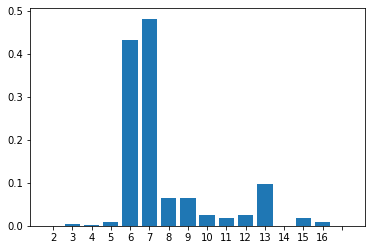

In [546]:
train_data_label = [lbl[9:] for lbl in train_data.columns]
plt.bar(train_data_label, train_data.isnull().sum() / len(train_data))

#### Skew

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

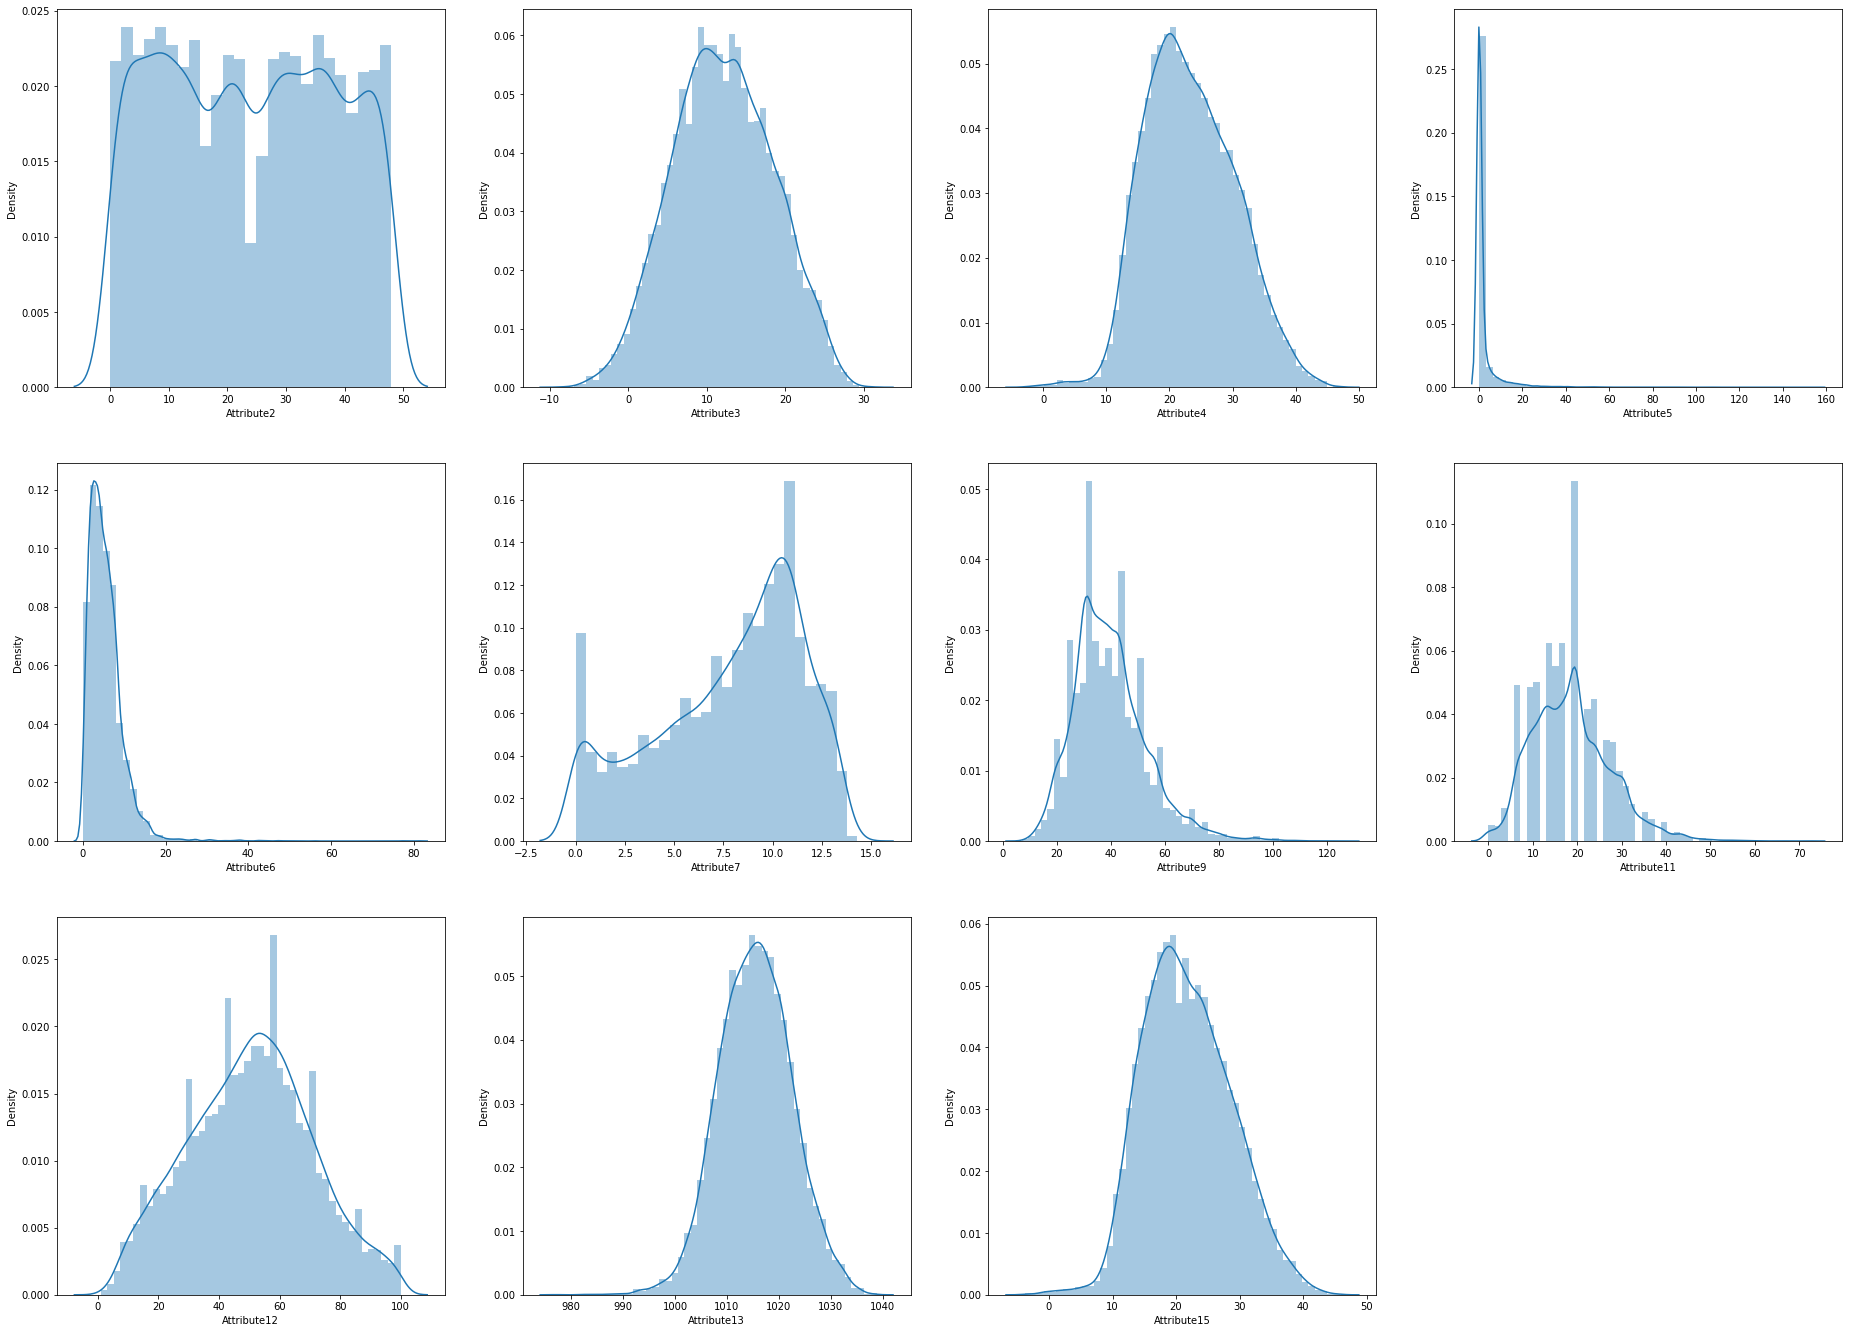

In [547]:
plt.figure(figsize=(32,32))
for i in range(len(numerical_cols)):
    plt.subplot(4,4,(i % len(numerical_cols) + 1))
    sns.distplot(train_data[numerical_cols[i]])
plt.show()

In [548]:
for i in range(len(numerical_cols)):
    skewness = train_data[numerical_cols[i]].skew()
    kurtosis = train_data[numerical_cols[i]].kurt()
    print(f"{numerical_cols[i]}分布\n偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

Attribute2分布
偏度(Skewness): 0.02476342559884261, 峰度(Kurtosis): -1.2351630926777952
Attribute3分布
偏度(Skewness): 0.013389247887025457, 峰度(Kurtosis): -0.47223127948031074
Attribute4分布
偏度(Skewness): 0.23461805838801364, 峰度(Kurtosis): -0.2514339937084529
Attribute5分布
偏度(Skewness): 8.299851946714377, 峰度(Kurtosis): 100.25392739023168
Attribute6分布
偏度(Skewness): 3.5994036873769004, 峰度(Kurtosis): 34.26099148388416
Attribute7分布
偏度(Skewness): -0.5629957396345622, 峰度(Kurtosis): -0.7077630530184136
Attribute9分布
偏度(Skewness): 0.918962360639609, 峰度(Kurtosis): 1.7372590667350005
Attribute11分布
偏度(Skewness): 0.6531483750935457, 峰度(Kurtosis): 0.8388430742236528
Attribute12分布
偏度(Skewness): 0.03426435776156373, 峰度(Kurtosis): -0.48527854460865516
Attribute13分布
偏度(Skewness): -0.04547355822520911, 峰度(Kurtosis): 0.16861625506353084
Attribute15分布
偏度(Skewness): 0.24959824062846556, 峰度(Kurtosis): -0.15189757096125112


### Not gonna process outliers cause they tell things, like rainfall

In [549]:
my_cols = categorical_cols + numerical_cols
X = train_data[my_cols].copy()
test_X = test[my_cols].copy()

## Define preprocessor

In [550]:
# 數值前處理
# Fill na with median
# Use scaler to norm
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) #comment if using randomforest
])

# 分類前處理
# Fill na with most_frequent
# Using label encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    #('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 前處理綁在一起
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Find the best hyperparameter with GridSearchCV

### Make pipeline

In [551]:
"""
my_pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('UpSample & DownSample', SMOTETomek(random_state=1)),
    ('model', RandomForestClassifier(random_state=1))
])

my_pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('UpSample & DownSample', SMOTETomek(random_state=1)),
    ('model', KNeighborsClassifier())
])
"""
my_pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('UpSample & DownSample', SMOTETomek(random_state=1)),
    ('model', LogisticRegression())
])

### GridSearchCV

#### Hyperparms

In [552]:
"""
param_grid = { 
    'model__n_estimators': [300, 350, 400, 450, 500],
    'model__max_features': ['auto', None, 'log2'],
    'model__max_depth' : [3, 4, 5, 6, 7],
    'model__criterion' :['gini', 'entropy']
}
param_grid = {
    'model__n_neighbors': [3, 4, 5, 6, 7]
}
"""


#### Fit 

In [553]:
#cv -> StratifiedKFold
#grid = GridSearchCV(my_pipeline, param_grid=param_grid, cv=5, scoring='f1')
#grid = GridSearchCV(my_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
#grid_result = grid.fit(X, y)

#### Result

In [554]:
#print(f'最佳F1值：{grid_result.best_score_}，最佳參數組合：{grid_result.best_params_}')
#print(f'最佳準確值：{grid_result.best_score_}，最佳參數組合：{grid_result.best_params_}')

最佳F1值：0.565933193402522，最佳參數組合：{'model__C': 0.01}


## Submit prediction

In [555]:
"""
my_pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('UpSample & DownSample', SMOTETomek(random_state=1)),
    ('model', RandomForestClassifier(
        random_state=1,
        max_features='auto',
        n_estimators=350,
        max_depth=7,
        criterion='gini'
        #max_features=grid_result.best_params_['model__max_features'],
        #n_estimators=grid_result.best_params_['model__n_estimators'],
        #max_depth=grid_result.best_params_['model__max_depth'],
        #criterion=grid_result.best_params_['model__criterion']
    ))
])

my_pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('UpSample & DownSample', SMOTETomek(random_state=1)),
    #('model', KNeighborsClassifier(n_neighbors=grid_result.best_params_['model__n_neighbors']))
    ('model', KNeighborsClassifier(n_neighbors=6))
])
"""
my_pipeline = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('UpSample & DownSample', SMOTETomek(random_state=1)),
    ('model', LogisticRegression(random_state=))
])


In [556]:
my_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Attribute2', 'Attribute3',
                                                   'Attribute4', 'Attribute5',
                                                   'Attribute6', 'Attribute7',
                                                   'Attribute9', 'Attribute11',
                                                   'Attribute12', 'Attribute13',
                                                   'Attribute15']),
                                                 ('cat',
                                          

In [557]:
result = my_pipeline.predict(test_X)

## Output result

In [558]:
result_df = pd.DataFrame({'id': [float(id) for id in range(len(result))], 
                        'ans' : result.tolist()})

result_df.to_csv('result.csv', index=False)